# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Описание данных:
- _`RowNumber`_ — индекс строки в данных
- _`CustomerId`_ — уникальный идентификатор клиента
- _`Surname`_ — фамилия
- _`CreditScore`_ — кредитный рейтинг
- _`Geography`_ — страна проживания
- _`Gender`_ — пол
- _`Age`_ — возраст
- _`Tenure`_ — сколько лет человек является клиентом банка
- _`Balance`_ — баланс на счёте
- _`NumOfProducts`_ — количество продуктов банка, используемых клиентом
- _`HasCrCard`_ — наличие кредитной карты
- _`IsActiveMember`_ — активность клиента
- _`EstimatedSalary`_ — предполагаемая зарплата
- _`Exited`_ — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключаемся-к-файлу" data-toc-modified-id="Подключаемся-к-файлу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключаемся к файлу</a></span></li><li><span><a href="#Проводим-первичный-анализ-DataFrame" data-toc-modified-id="Проводим-первичный-анализ-DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проводим первичный анализ DataFrame</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разбиваем-данные-на-выборки" data-toc-modified-id="Разбиваем-данные-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбиваем данные на выборки</a></span></li><li><span><a href="#Преобразовываем-категориальные-признаки-в-численные-с-использованием-техники-прямого-кодирования,-или-отображения-(англ.-One-Hot-Encoding,-OHE)." data-toc-modified-id="Преобразовываем-категориальные-признаки-в-численные-с-использованием-техники-прямого-кодирования,-или-отображения-(англ.-One-Hot-Encoding,-OHE).-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразовываем категориальные признаки в численные с использованием техники прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).</a></span></li><li><span><a href="#Разделяем-исходные-данные-на-обучающую-и-валидационную-выборки." data-toc-modified-id="Разделяем-исходные-данные-на-обучающую-и-валидационную-выборки.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделяем исходные данные на обучающую и валидационную выборки.</a></span><ul class="toc-item"><li><span><a href="#Анализ-созданных-наборов-данных" data-toc-modified-id="Анализ-созданных-наборов-данных-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Анализ созданных наборов данных</a></span></li></ul></li><li><span><a href="#ML-модели-без-учёта-баланса" data-toc-modified-id="ML-модели-без-учёта-баланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>ML модели без учёта баланса</a></span><ul class="toc-item"><li><span><a href="#Подберём-гиперпараметры-для-DecisionTreeClassifier-(Дерево-решений)" data-toc-modified-id="Подберём-гиперпараметры-для-DecisionTreeClassifier-(Дерево-решений)-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Подберём гиперпараметры для DecisionTreeClassifier (Дерево решений)</a></span></li><li><span><a href="#Подберём-гиперпараметры-для-RandomForestClassifier-(Случайный-лес)" data-toc-modified-id="Подберём-гиперпараметры-для-RandomForestClassifier-(Случайный-лес)-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Подберём гиперпараметры для RandomForestClassifier (Случайный лес)</a></span></li><li><span><a href="#Подберём-гиперпараметры-для-LogisticRegression-(Логистическая-регрессия)" data-toc-modified-id="Подберём-гиперпараметры-для-LogisticRegression-(Логистическая-регрессия)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Подберём гиперпараметры для LogisticRegression (Логистическая регрессия)</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#ML-модели-с-учётом-баланса" data-toc-modified-id="ML-модели-с-учётом-баланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ML модели с учётом баланса</a></span><ul class="toc-item"><li><span><a href="#Подбор-гиперпараметров-для-DecisionTreeClassifier-(Дерево-решений)" data-toc-modified-id="Подбор-гиперпараметров-для-DecisionTreeClassifier-(Дерево-решений)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Подбор гиперпараметров для DecisionTreeClassifier (Дерево решений)</a></span></li><li><span><a href="#Подбор-гиперпараметров-для-RandomForestClassifier-(Случайный-лес)" data-toc-modified-id="Подбор-гиперпараметров-для-RandomForestClassifier-(Случайный-лес)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Подбор гиперпараметров для RandomForestClassifier (Случайный лес)</a></span></li><li><span><a href="#Подбор-гиперпараметров-для-LogisticRegression-(Логистическая-регрессия)" data-toc-modified-id="Подбор-гиперпараметров-для-LogisticRegression-(Логистическая-регрессия)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Подбор гиперпараметров для LogisticRegression (Логистическая регрессия)</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование-ML-модели-DecisionTreeClassifier-(Дерево-решений)-с--ранее-подобранными-гиперпараметрами." data-toc-modified-id="Тестирование-ML-модели-DecisionTreeClassifier-(Дерево-решений)-с--ранее-подобранными-гиперпараметрами.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование ML модели DecisionTreeClassifier (Дерево решений) с  ранее подобранными гиперпараметрами.</a></span></li><li><span><a href="#Тестирование-ML-модели-RandomForestClassifier-(Случайный-лес)-с--ранее-подобранными-гиперпараметрами." data-toc-modified-id="Тестирование-ML-модели-RandomForestClassifier-(Случайный-лес)-с--ранее-подобранными-гиперпараметрами.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Тестирование ML модели RandomForestClassifier (Случайный лес) с  ранее подобранными гиперпараметрами.</a></span></li><li><span><a href="#Тестирование-ML-модели-LogisticRegression-(Логистическая-регрессия)-с--ранее-подобранными-гиперпараметрами." data-toc-modified-id="Тестирование-ML-модели-LogisticRegression-(Логистическая-регрессия)-с--ранее-подобранными-гиперпараметрами.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Тестирование ML модели LogisticRegression (Логистическая регрессия) с  ранее подобранными гиперпараметрами.</a></span></li><li><span><a href="#Сравнение-результатов-работы-ML-моделей" data-toc-modified-id="Сравнение-результатов-работы-ML-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение результатов работы ML-моделей</a></span></li><li><span><a href="#Проведём-исследование-метрики-AUC-ROC" data-toc-modified-id="Проведём-исследование-метрики-AUC-ROC-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проведём исследование метрики AUC-ROC</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-и-выведем-на-график-показатели-AUC-ROC,-по-всем-использованным-ML-моделям." data-toc-modified-id="Рассчитаем-и-выведем-на-график-показатели-AUC-ROC,-по-всем-использованным-ML-моделям.-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Рассчитаем и выведем на график показатели AUC-ROC, по всем использованным ML-моделям.</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

 **Импортируем требуемые для проведения анализа библиотеки.**

In [1]:
! pip install missingno imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  # Автоматический подбор гиперпараметров
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

## Подготовка данных

### Подключаемся к файлу

In [3]:
# Подключаемся к файлу с данными
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

### Проводим первичный анализ DataFrame

In [4]:
# Определяем размерах таблицы с данными (количество строк и столбцов) в DataFrame
data.shape

(10000, 14)

In [5]:
# Выводим список названий столбцов
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Выводим первые 5 строк
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
# Выводим первые 5 строк
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [8]:
# Определяем наличие нулевых значений и типы данных
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Выводим данные по отсутствующим значениям в DataFrame
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<Figure size 1600x600 with 0 Axes>

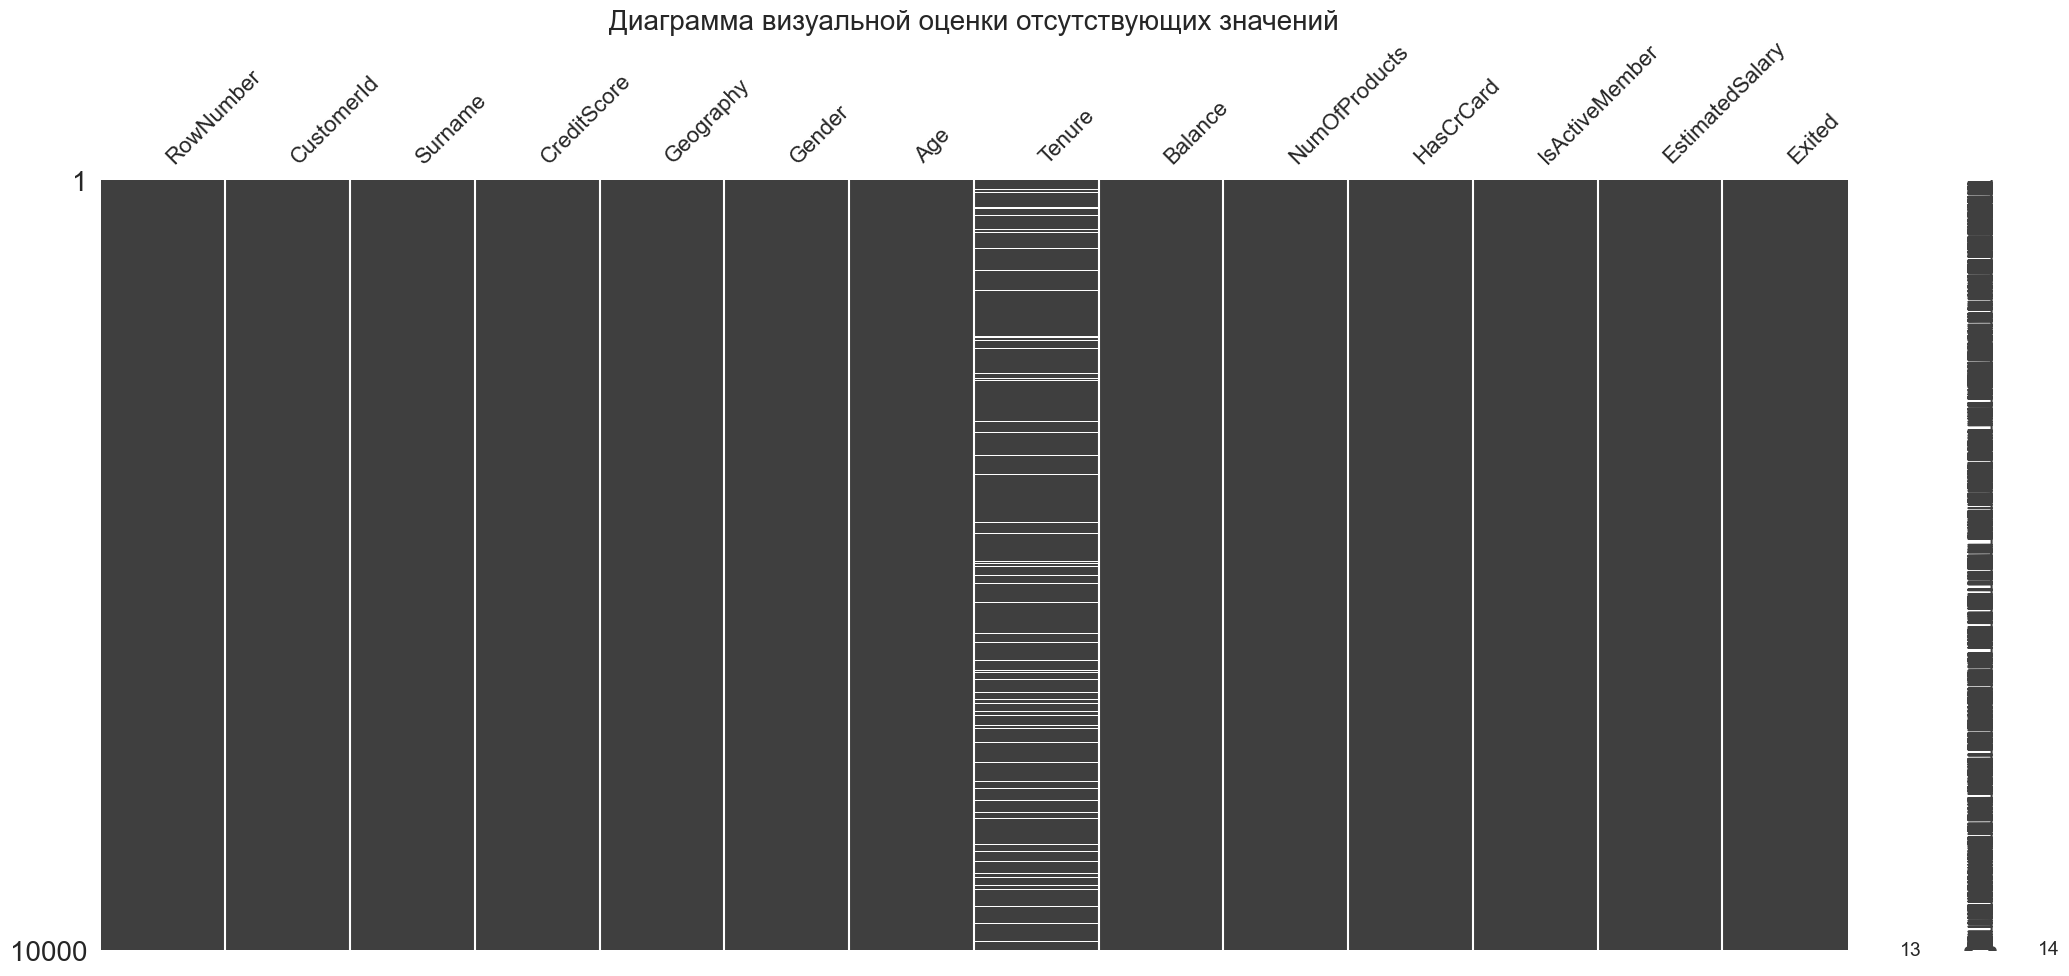

In [10]:
# Выведем диаграмму для визуальной оценки случайности пропусков.
plt.figure(figsize=(16, 6))  # Задаём размер гистограммы
sns.set()  # Инициируем стиль графиков seaborn
# sns.set(font_scale=2)  # Изменяем размер текста
msno.matrix(data)
plt.title('Диаграмма визуальной оценки отсутствующих значений', size=20)

plt.show()

**Распределение пропущенных значений в датасете выглядит случайным (случайность внутри столбца с пропусками), закономерностью были бы пропуски, например, только в первой половине наблюдений.**

In [11]:
# Выводим уникальные значаения столбца "Tenure" (сколько лет человек является клиентом банка)
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [12]:
# Определяем наличие полных дубликатов строк в DataFrame
dupl_count = data.duplicated().sum()
print(f'Количество полных дубликатов в DataFrame составляет: {dupl_count}')

Количество полных дубликатов в DataFrame составляет: 0


**В рамках первичного анализа данных, были проверены слующие параметры DataFrame:**
- Вывели и ознакомились с размерами таблицы. Таблица `содержит 10000 строк записей и 14 столбцов`.
- Вывели и ознакомились с названиями столбцов данных, а так же проверили коррекность их написания, что в рамках исследования позволит избежать ошибок при обращении к конкретным столбцам. `Названия столбцов корректны и не содержат ошибок в написании`.
- Вывели по 5 строк начала таблицы и конца таблицы, для визуальной оценки данных. На этом этапе мы определяем принадлежность данных к их типам, этот этап является обязательным так как, позволяет проверить корректность автоматического определения типа данных библиотекой Pandas.
- Выводим и анализируем типы данных автоматически распознанные библиотекой Pandas. На этом этапе, мы сверяем автоматически сформированные типы данных библиотекой Pandas, с фактическими данными которые содержаться в DataFrame. В случае не корректного их определения, для корректности дальнейшего анализа, потребуется заменить тип данных. В результате проведённого анализа, сформирован вывод о `корректности автоматического определения типа данных`, типы данные осталяем без изменений.
- Проанализируем данные на наличие в них пустых значений. В случае наличия пропущенных/отсутсвующих данных необходимо провести работы направленные на восстановление данных, а в случае невозможности принять решение о необходимости их удаления из DataFrame. Этап позволяет исключить в дальнейшем исследовании искажение расчётов и итогового результата. По результатам проведённого исследования установлено, что DataFrame имеет отсутсвующие значения, только в одном столбце `"Tenure"` (*сколько лет человек является клиентом банка*)
- Проведём исследование данных DataFrame на наличие полных дубликатов строк. На этом этапе проверки выяляются дублирующие строки, которые могут вносить искажения в результат проводимого исследования. В случае их обнаружения, необходимо в обязательном порядке очисть DataFrame от этих строк. В рамках проводимой работы, установлено в `DataFrame не содержит дубликатов данных`.
- **Содержание столбцов `RowNumber`, `CustomerId` и `Surname` содержат данные, которые не оказывают влияние на дальнейшее исследование. Принимается решение для удаления этих столбцов из DataFrame.**
    - **RowNumber** - дублирует индекс строки, начинает счет с единицы;
    - **CustomerId** - уникальный идентификатор клиента, он не дает дополнительной полезной информации;
    - **Surname** - фамилия - тоже идентификатор для определенного человека, но может повторятся, так как фамилии не уникальны

In [13]:
# Проводим удаление столбцов из DataFarme
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

**Построим тепловую карту корреляционной зависимости признаков DataFrame**

Учитывая, что метод `corr()` в Pandas работает только с числовыми данными, поэтому необходимо убедиться, что для вычисления корреляции, передаются только числовые столбцы. Для пободной проверки, используем конструкцию `data.select_dtypes(include=['number'])`, которая обеспечит передачу только числовых значений, для расчёта корреляции и построения графика.

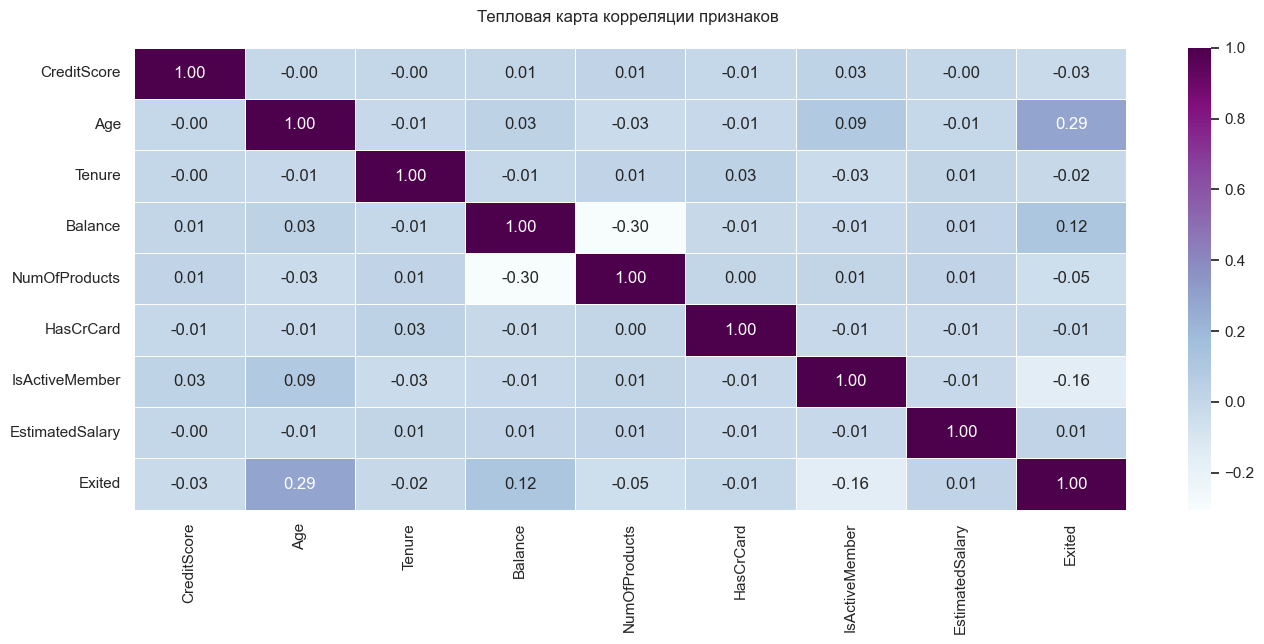

In [14]:
# Выбираем только числовые столбцы
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(16, 6))  # Задаём размер тепловой карты
sns.heatmap(numeric_data.corr(),  # Используем только числовые данные
            annot=True, # Отображение цифровых значений
            fmt=".2f",   # Округляем значения
            linewidth=.5, # Задём расстояние между ячейками
            cmap="BuPu")  # Задаём цветовую схему (crest, YlGnBu, Blues, BuPu, Greens)
# sns.set(font_scale=2)  # Изменяем размер текста
plt.title('Тепловая карта корреляции признаков \n')
plt.grid(True)
plt.show()

В результате построения тепловой карты корреляции, стоит отметить, что не смотря на `отсутствие` корреляции между признаками, имеется некоторая слабая зависимость между столбцами `Exited` и `Age` в размере **0.29**. Т.к. размер этого значения менее 0.5 можно говорить что зависимость между данными `отсутсвует`.

**Проверяем наличии информации на основании которой возможно восстанавление отсутствующих данных столбца `"Tenure"`**

In [15]:
# произведём подсчёт количества уникальных значений по столбцу "Tenure"
data['Tenure'].value_counts()

Tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

In [16]:
# Создаём новую переменную и копируем в неё весь DataFrame
data_tenure = data.copy()
data_tenure['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [17]:
# Подсчитываем количество уникальных значений в столбце "сколько лет человек является клиентом банка"
data_tenure['Tenure'].value_counts()

Tenure
5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: count, dtype: int64

In [18]:
# Выводим уникальные значения столбца "Geography" из нового DataFrame "data"
data_tenure['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
# Выводим уникальные значения столбца "Geography" из исходного DataFrame "tenure_nan"
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
# Выводим уникальные значения столбца "CreditScore" из нового DataFrame "tenure_nan"
data_tenure['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [21]:
# Выводим уникальные значения столбца "Age" из нового DataFrame "tenure_nan"
data_tenure['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [22]:
# Выводим уникальные значения столбца "NumOfProducts" из нового DataFrame "tenure_nan"
data_tenure['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [23]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [24]:
# Проверяем данные исходного DataFrame, на предмет отсутствия случайных измениний
data['Tenure'].value_counts()

Tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

In [25]:
print(f'Доля отсутствующих значений ровна: {data["Tenure"].isna().sum() / data["CreditScore"].count() * 100:.3f}%')

Доля отсутствующих значений ровна: 9.090%


**Используем `KNNImputer` для заполнения отсутствующих значений в столбце `Tenure`**

In [26]:
# # KNN - заполнение пропущенных значений с использованием k-ближайших соседей.
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# # numpy.ravel Возвращает непрерывный плоский массив. Возвращается одномерный массив, содержащий элементы входных данных.
# data["Tenure"] = imputer.fit_transform(data[["Tenure"]]).ravel()

In [27]:
# # произведём подсчёт количества уникальных значений по столбцу "Tenure" после использщования KNNImputer
# data['Tenure'].value_counts()

**Используем `SimpleImputer` для заполнения отсутствующих значений в столбце `Tenure`**

In [28]:
# # SimpleImputer Класс предоставляет базовые стратегии для вменения пропущенных значений. 
# # Пропущенные значения могут быть условно вычислены с помощью предоставленного постоянного значения или с 
# # использованием статистики (среднее, медианное или наиболее частое) каждого столбца, в котором расположены 
# # пропущенные значения.
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='median')  # mean, median, most_frequent
# # numpy.ravel Возвращает непрерывный плоский массив. Возвращается одномерный массив, содержащий элементы входных данных.
# data["Tenure"] = imp.fit_transform(data[["Tenure"]]).ravel()

In [29]:
# произведём подсчёт количества уникальных значений по столбцу "Tenure" после использования SimpleImputer
data['Tenure'].value_counts()

Tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

**Удаляем отсутствующие значения в столбце `"Tenure"`**

In [30]:
# Удаляем отсутствующие значения в столбце "Tenure"
data = data.dropna(subset=['Tenure'], axis=0)
data['Tenure'].value_counts()

Tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

In [31]:
# Проверяем изменения после удаления отсутствующих значений
data.shape

(9091, 11)

<br><ol>
    <li>Провели подсчёт количества отсутсвующих значений в столбце "Tenure". Их оказалось 909 или <b>9.09 %</b>, т.к. такое количество близко к критичному уровню потерь <i>(Справочно: <b>Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%)</b></i>, `было принято решение найти подходящий вариант обработки, который позволил бы сохранить все данные`, а не просто их удалить.</li>
    
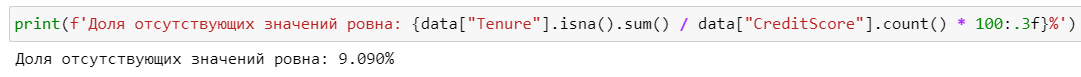    
    
<li><b>Использование Медианного значения.</b> От использования медианного значения было принято отказаться, т.к. количество значений 5 в столбце "Tenur" увеличивается в 2 раза. Что по моему мнению будет вносить искажения в итоговый результат.</li>
    
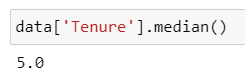
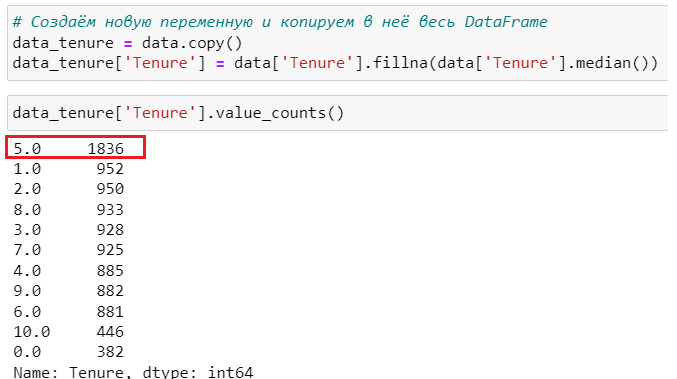
    
<li><b>Использование Среднего значения.</b> От использования среднего значения было принято отказаться, т.к. количество значений 4,997 (с учётом округления - 5) в столбце "Tenur" увеличивается в 2 раза. Что по моему мнению, так же как и медианное значение будет вносить искажения в итоговый результат.</li>
    
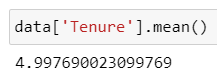    
    
<li><b>Использование комбинации нескольких столбцов</b> с расчётом среднего и медианного значения. От использования данного подхода так же было принято решение отказаться, т.к. ситуация с увеличением значений "5" в столбце "Tenure" так же увеличивается в 2 раза. По моему мнению, так же как и медианное значение будет вносить искажения в итоговый результат.</li>

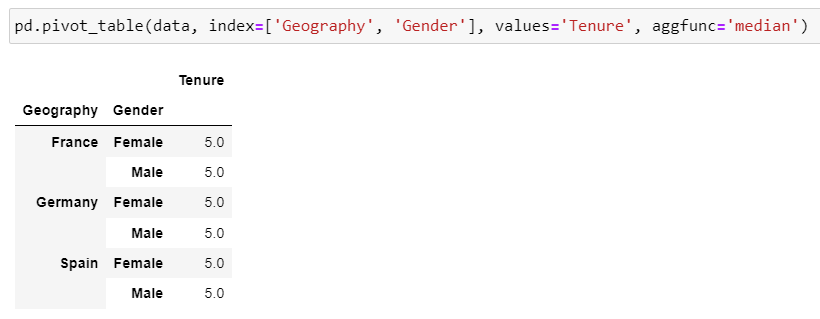
    
<br><li><b>Создание нового класса в виде значения "-1"</b>, фиксированной отрицательной "заглушкой". Но когда модель будет "проверять" новых, неизвестных ей заемщиков (чтобы предсказать "отток / не отток") - в этих новых строках, не будет отрицательных значений, а будут пропуски. Соответсвенно с созданием нового класса ML модель не сможет корректно работать.</u></li>

<li>Для заполнения отсутствующих значений использовался <b>KNNImputer</b>. Эффект от его заполнения оказался сопоставимым с заполнением средним значением. <b><i>От использования KNNImputer было принято отказаться, т.к. количество значений 4,997 (с учётом округления - 5) в столбце "Tenur" увеличивается в 2 раза. Что по моему мнению, так же как и среднее значение будет вносить искажения в итоговый результат. На основании этого, от использования данного подхода, так же принято решение отказаться</i></b></li>
    
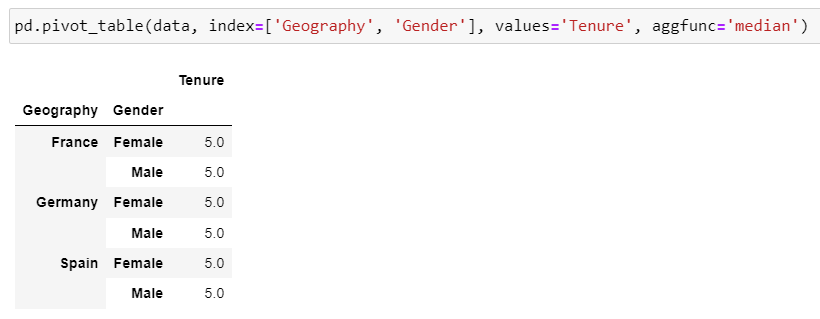    
   <li>Для заполнения отсутствующих значений использовался <b>SimpleImputer</b>. Эффект от его заполнения оказался сопоставимым с заполнением медианным или средним значениями. При его использовании были применены 3 стратегии вменения изменений (Среднее значение, Медианное значение и Наиболее частое значение). <b><i>От использования SimpleImputer было принято отказаться, т.к. количество значений 1 или 4,997 (с учётом того факта что такие значение после обучения модели на "вход" подаваться не будут, необходимо провести округление до 5) или 5 в столбце "Tenur" увеличивается в 2 раза. Что по моему мнению, так же будет вносить искажения в итоговый результат.</i></b></li>
    
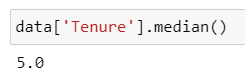
    
<br><li><i>По итогам проведённого исследования, по восстановлению/сохранению данных <b>принимается решение удалить строки</b> с отсутствующими значениями в столбце "Tenure" из DataFrame.</i></li></ol>

**В результате проведённого исследования проверены следующие гипотезы:**
- Замена отсутствующих значений средним значением или медианой. `Замена не целесообразна`, т.к. значение 5 столбца "Tenure" увеличивается в два раза, с 952 до 1836.
- Замена отсутствующих значений на основании данных столбца `Geography` (*страна проживания*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `Geography`.
- Замена отсутствующих значений на основании данных столбца `CreditScore` (*кредитный рейтинг*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `CreditScore`.
- Замена отсутствующих значений на основании данных столбца `Age` (*возраст*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `Age`.
- Замена отсутствующих значений на основании данных столбца `NumOfProducts` (*количество продуктов банка, используемых клиентом*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `NumOfProducts`.

**Замену отсутствующих значений производить не будем, вместо этого принимаем решение удалить все строки в которых отсутствуют значения в столбце `Tenure`.**

## Исследование задачи

Exited
0    7237
1    1854
Name: count, dtype: int64


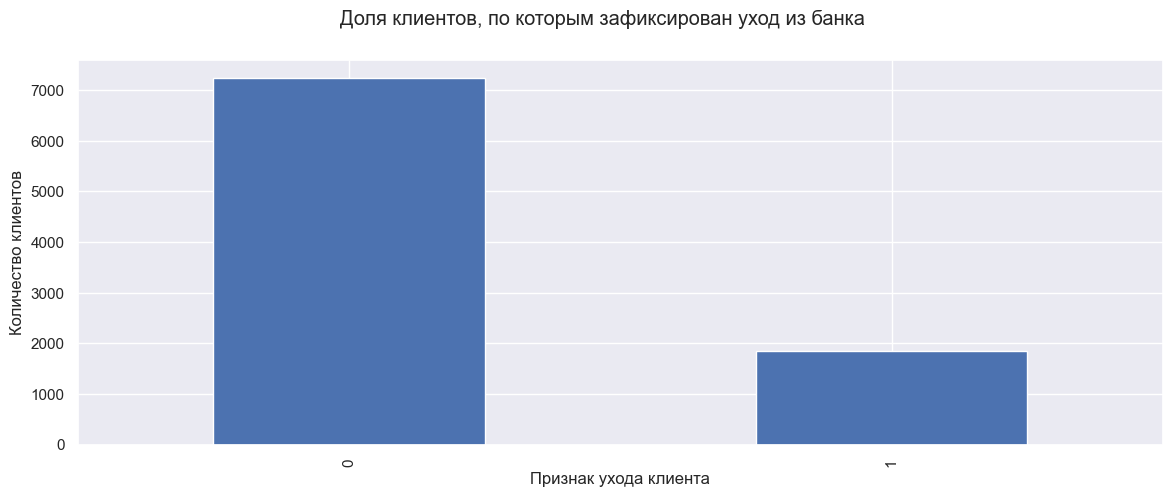

In [32]:
plt.figure(figsize=(14, 5))  # Задаём размер гистограммы
class_frequency = data['Exited'].value_counts(normalize=False)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.suptitle('Доля клиентов, по которым зафиксирован уход из банка')
plt.xlabel('Признак ухода клиента')
plt.ylabel('Количество клиентов')
plt.show()

In [33]:
# Проводим проверку на наличие дисбаланса в данных
df_sum = data['Exited'].sum()
df_count = data['Exited'].count()
print(f'Доля клиентов, по которым зафиксирован уход из банка составляет: {(df_sum / df_count * 100):.2f}%, \
от общего количества записей в данных.')

Доля клиентов, по которым зафиксирован уход из банка составляет: 20.39%, от общего количества записей в данных.


**Полученный результат 20,39% или соотношение 1:5 свидетельствует о несбалансированности данных**

**Построим гистограмму для проверки выявленной слабой зависимости между столбцами `Exited` и `Age` в размере 0.29 на Тепловой карте корреляции признаков**

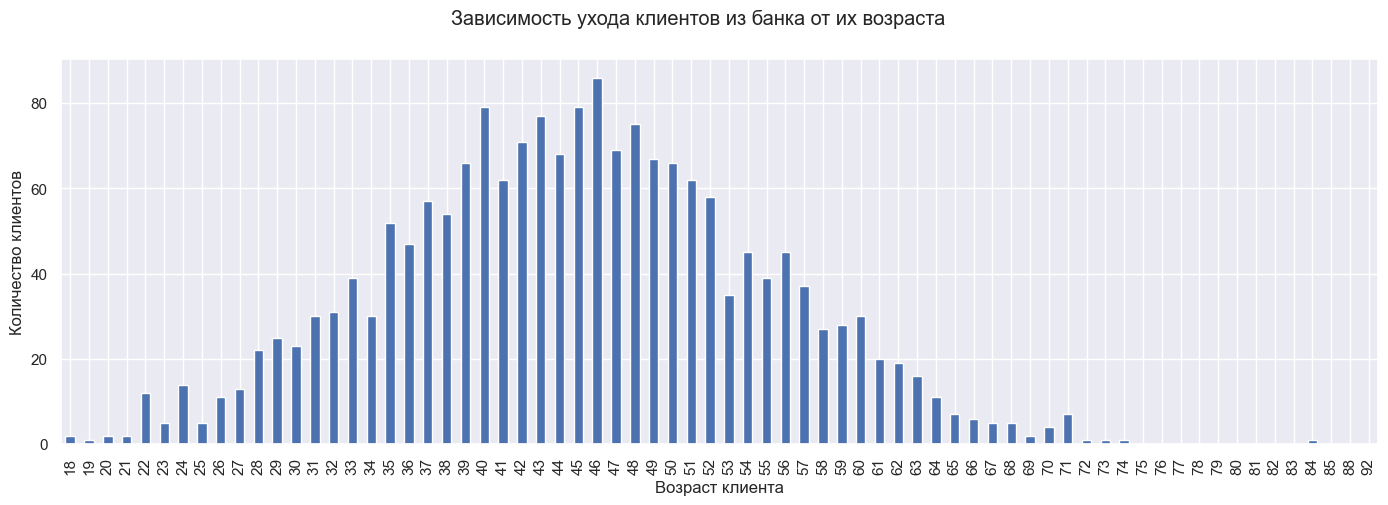

In [34]:
# Посчитаем количество клиентов имеющих признак ухода из Банка (1) в целевом столбце и сгруппируем значения по возрасту
df_age = data.groupby(by=['Age'])['Exited'].sum()
# Посмотрим гистограмму зависимости ухода клиентов из банка от их возраста
df_age.plot(figsize=(17,5),kind='bar')
plt.suptitle('Зависимость ухода клиентов из банка от их возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество клиентов')
plt.show()

В результате анализа построенной диаграммы, можно предположить, что клиента с 28 до 63 лет склонны принимать решение о переходе в другой банк. При этом обращает на себя внимание тот факт, что **размер корреляционной зависимости составляет 0.29**, что является крайне незначительным показателем. Опираясь на этот показатель, **не корректно говорить о том, что существует прямая зависимость между этимим показателями**.

### Разбиваем данные на выборки

In [35]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [36]:
# Создаём переменную features (особенности), которая не содержит целевого столбца Exited
features = data.drop(['Exited'], axis=1)
# Создаём переменную target (цель), которая содержит только с целевой столбцец данных Exited 
target = data['Exited']

In [37]:
# Используем объект Counter, чтобы подсчитать представителей каждого класса
counter = Counter(target)
print(counter)

Counter({0: 7237, 1: 1854})


**Полученный результат {{0: 7237, 1:1854}}, подтверждает несбалансированность данных.**

### Преобразовываем категориальные признаки в численные с использованием техники прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).

**Для осуществления контроля преобразований, выводим образец DataFrame `до` применения OneHotEncoder**

In [38]:
features.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57


In [39]:
"""Важно!!! Кодировать данные (используя OneHot-Encoding) следует ПОСЛЕ разбиения данных на выборки, чтобы исключить утечку данных. 
OneHotEncoding https://datagy.io/sklearn-one-hot-encode/"""
# Проводим кодирование категориальных данных 
transformer = make_column_transformer(
    (OneHotEncoder(), ['Geography', 'Gender']),  # Указываем категориальные столбцы, поддлежащие преобразованию
    verbose_feature_names_out=False,  # Указываем что не нужно добавлять префикс преобразователя ко всем именам объектов
    remainder='passthrough')  # При указании remain='passsthrough' пропускаем все оставшиеся столбцы.
transformed = transformer.fit_transform(features)
features = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

**Для осуществления контроля преобразований, выводим образец DataFrame `после` применения OneHotEncoder**

In [40]:
features.head(3)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57


### Разделяем исходные данные на обучающую и валидационную выборки.

Фиксируем random_state значением. Требуется, чтобы воспроизводимость результатов разбиения выборки на обучающую (тренировочную) / валидационную при всех последующих запусках кода, подвыборки были идентичными.

В stratify пердаём значения, его использование позволит сохранить баланс классов 1/0 ("уйдет"/"не уйдет") в 2х выборках..

In [41]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target,
                                                                              stratify=target,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

#### Анализ созданных наборов данных

In [42]:
# Проверяем размерность тренировочной, валидационной и тестовой выборок
variables = [features_train, features_valid, target_train, target_valid]
for i in variables:
    print(i.shape[0])

6818
2273
6818
2273


In [43]:
# Проверяем размерность тренировочной, валидной и тестовой выборок
variables = {'Тренировочной выборке': target_train, 'Валидационной выборке': target_valid}
for key, value in variables.items():
    # Проводим проверку на наличие дисбаланса в данных
    df_sum = value.sum()
    df_count = value.count()
    print(f'Доля клиентов, по которым зафиксирован уход из банка на {key} составляет: {(df_sum / df_count * 100):.2f}%.')

Доля клиентов, по которым зафиксирован уход из банка на Тренировочной выборке составляет: 20.39%.
Доля клиентов, по которым зафиксирован уход из банка на Валидационной выборке составляет: 20.41%.


In [44]:
# Используем объект Counter, чтобы подсчитать представителей каждого класса и удостовериться, 
# что преобразованный набор данных был создан правильно.
samples = {'target_train': target_train, 'target_valid': target_valid}
for key, meaning in samples.items():
    counter = Counter(meaning)
    print(f'{key} содержит: {counter}')

target_train содержит: Counter({0: 5428, 1: 1390})
target_valid содержит: Counter({0: 1809, 1: 464})


**Распределение значений целевого столбца для `тренировочной выборки 20.39%`, для `валидационной выборки 20.41% является равномерным` распределением имеющихся данных. Распределение оставляем равномерным, в рамках обучения ML моделей на несбалансированных данных.**

**Стандартизируем все признаки к одному масштабу**

**Для осуществления контроля преобразований, выводим образец DataFrame `до` применения метода стандартизации числовых признаков**

In [45]:
features_train.head(3)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9085,1.0,0.0,0.0,0.0,1.0,644.0,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
6851,1.0,0.0,0.0,1.0,0.0,688.0,38.0,7.0,123544.21,1.0,1.0,1.0,157664.02


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Из приведённого выше среза DataFrame становиться очевидным, что <b>числовые признаки</b> (например: 'CreditScore', 'Age', 'Tenure', 'Balance' и т.д.) <b>имеют разный формат</b>. 

Учитывая, что <b>все признаки в рамках исследования имеют равную значимость</b> и чтобы исключить возможность выделения из признаков DataFrame наиболее или наименее значимых, необходимо произвести их масштабирование, т.е. <b>привести к одному маштабу</b>.
</div>

In [46]:
# В переменной укажем все столбцы с численными признаками
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()  #Создадим объект этой структуры scaler
scaler.fit(features_train[numeric])  #настроим объект scaler на обучающих данных

# Преобразуем обучающую и валидационную выборки функцией transform(). 
# Изменённые наборы сохраним в переменной features_train_scaled (англ. «масштабированные признаки для обучения»)
features_train[numeric] = scaler.transform(features_train[numeric])
# Изменённые наборы сохраним в переменной features_valid_scaled (англ. «масштабированные признаки для проверки»)
features_valid[numeric] = scaler.transform(features_valid[numeric])
pd.options.mode.chained_assignment = None # Чтобы предупреждение не появлялось в код добавим эту строку кода

**Для осуществления контроля преобразований, выводим образец DataFrame `после` применения метода стандартизации числовых признаков**

In [47]:
features_train.head(3)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9085,1.0,0.0,0.0,0.0,1.0,-0.073656,-1.036332,0.691680,1.262714,-0.910732,0.648852,-1.040723,-1.224135
0,1.0,0.0,0.0,1.0,0.0,-0.333215,0.298422,-1.035494,-1.226255,-0.910732,0.648852,0.960871,0.032686
6851,1.0,0.0,0.0,1.0,0.0,0.383169,-0.082936,0.691680,0.756828,-0.910732,0.648852,0.960871,1.013408


**Для чего нужно масштабировать признаки, перед подачей в линейную модель машинного обучения (например в линейную регрессию)?** 

Нужно минимизировать функцию потерь методом градиентного спуска. В случае разных масштабов признаков (например, год рождения и количество детей) её линии уровня будут иметь вид вытянутых эллипсов. Тогда вектор антиградиента и направление от текущей точки к минимуму функции потерь могут не совпадать, в результате мы можем уйти далеко и не в ту сторону, и в зависимости от шага градиентного спуска, либо придётся сделать больше итераций, либо вообще не будет сходимости. 

Если же признаки отмасштабированы, то линии уровня похожи на окружности. И проблема несовпадения антиградиента и направления к минимуму будет не так выражена.

### ML модели без учёта баланса

#### Подберём гиперпараметры для DecisionTreeClassifier (Дерево решений)

In [48]:
def selection_parameters_treeclassifier(X_train, y_train):
    """
    Подбирает гиперпараметры для модели дерева решений с использованием GridSearchCV.

    Args:
        X_train: array-like, shape (n_samples, n_features)
            Обучающие данные.
        y_train: array-like, shape (n_samples,)
            Целевые значения.

    Returnes:
    dict
        Лучшие гиперпараметры, подобранные в процессе кросс-валидации.
    """
    params = {'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [None] + list(range(2, 20)),
              'max_leaf_nodes': list(range(2, 100)), # Определяем лучшее количество узлов
              'min_samples_split': [ 4, 5, 6]}  # Определяем лучшее количество выборок для разделения внутреннего узла
    # Подбираем параметры под Дерево решений
    grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                  params, 
                                  verbose=1,
                                  n_jobs=-1,
                                  cv=3)
    grid_search_cv.fit(X_train, y_train)

    return grid_search_cv.best_params_

In [49]:
%%time
best_params_dtl = selection_parameters_treeclassifier(features_train, target_train)
best_params_dtl

Fitting 3 folds for each of 33516 candidates, totalling 100548 fits
CPU times: total: 1min 35s
Wall time: 2min 5s


{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 45,
 'min_samples_split': 4,
 'splitter': 'best'}

In [50]:
def decision_tree(features_x, target_x, best_params):
    """
    Обучает модель дерева решений на тренировочных данных и оценивает ее качество на валидационных данных.

    Args:
        features_x: array-like, shape (n_samples, n_features)
            Валидационные данные.
        target_x: array-like, shape (n_samples,)
            Целевые значения для валидационных данных.
        best_params: dict
            Словарь с лучшими гиперпараметрами для модели.

    Returnes:
        None
    """
    #  Настраиваем гиперпараметры модели
    model = DecisionTreeClassifier(criterion=best_params['criterion'], 
                                   splitter=best_params['splitter'],
                                   random_state=42,
                                   max_leaf_nodes=best_params['max_leaf_nodes'], 
                                   min_samples_split=best_params['min_samples_split'],
                                   max_depth=best_params['max_depth']) 
    model.fit(features_train, target_train)  # Обучаем модель на тренировочной выборке
    # Проводим проверку качества модели на выборке 
    predicted_valid = model.predict(features_x)  # Получаем предсказание модели
    result = f1_score(target_x, predicted_valid)

    return print(f'Лучшая глубина дерева max_depth = {best_params['max_depth']}, F1-мера: {result:.4f}.')

In [51]:
decision_tree(features_valid, target_valid, best_params_dtl)

Лучшая глубина дерева max_depth = 8, F1-мера: 0.5962.


#### Подберём гиперпараметры для RandomForestClassifier (Случайный лес)

In [52]:
def selection_parameters_forestclassifier(X_train, y_train):
    """
    Подбирает гиперпараметры для модели дерева решений с использованием GridSearchCV.

    Args:
        X_train: array-like, shape (n_samples, n_features)
            Обучающие данные.
        y_train: array-like, shape (n_samples,)
            Целевые значения.

    Returnes:
    dict
        Лучшие гиперпараметры, подобранные в процессе кросс-валидации.
    """
    parametrs = {'criterion':['gini', 'entropy'],
                 'n_estimators': [10, 100, 200],
                 'max_depth': range(1, 21, 2),
                 'min_samples_leaf': range(1, 8),
                 'min_samples_split': range(2, 10, 2)}
    
    # Подбираем параметры под Случайный лес
    grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                        parametrs, 
                        scoring = 'accuracy', 
                        n_jobs=-1, 
                        cv=3)

    grid.fit(X_train, y_train)
    return grid.best_params_  # Выводим лучшие гиперпараметры

In [53]:
%%time
best_params_rfc = selection_parameters_forestclassifier(features_train, target_train)
best_params_rfc

CPU times: total: 27 s
Wall time: 3min 34s


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [54]:
def random_forest(features_x, target_x, best_params):
    """
    Функция принимает валидационную и тестовую выборки применяет переданные гиперпараметры и выводит итоговую информацию 
    """
    # обучаем модель с заданным количеством деревьев
    model = RandomForestClassifier(criterion=best_params['criterion'], 
                                   random_state=42, 
                                   n_estimators=best_params['n_estimators'], 
                                   max_depth=best_params['max_depth'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   min_samples_split=best_params['min_samples_split'])
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_x)  # Получаем предсказание модели
    result = f1_score(target_x, predictions_valid)

    return print(f'Лучшая величина гиперпараметра n_estimators = {best_params['n_estimators']}, F1-мера: {result:.4f}.')

In [55]:
random_forest(features_valid, target_valid, best_params_rfc)

Лучшая величина гиперпараметра n_estimators = 100, F1-мера: 0.6194.


#### Подберём гиперпараметры для LogisticRegression (Логистическая регрессия)

In [56]:
def selection_parameters_logisticregression(X_train, y_train):
    """
    Подбирает гиперпараметры для модели дерева решений с использованием GridSearchCV.

    Args:
        X_train: array-like, shape (n_samples, n_features)
            Обучающие данные.
        y_train: array-like, shape (n_samples,)
            Целевые значения.

    Returnes:
    dict
        Лучшие гиперпараметры, подобранные в процессе кросс-валидации.
    """
    # Определяем параметры для GridSearchCV
    parameter = {
        'logisticregression__penalty': ['l1', 'l2'], 
        'logisticregression__C': [1, 10, 100, 1000],
        'logisticregression__solver': ['liblinear']  # Используем решатель, поддерживающий l1
    }
    
    # Создаем пайплайн
    pipeline = Pipeline([
        # ('scaler', StandardScaler()),  # Не забудьте инициализировать scaler
        ('logisticregression', LogisticRegression(random_state=42, max_iter=1000))
    ])
    
    # Настраиваем GridSearchCV
    grid_search = GridSearchCV(pipeline,  
                               param_grid=parameter,
                               scoring='accuracy',
                               cv=5,
                               verbose=0)
    
    # Обучаем модель
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_  # Выводим лучшие гиперпараметры

In [57]:
%%time
# Вызываем функцию подбора гиперпараметров для модели Логистической регрессии
best_params_lr = selection_parameters_logisticregression(features_train, target_train)
best_params_lr

CPU times: total: 3.66 s
Wall time: 3.66 s


{'logisticregression__C': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [58]:
def logistic_regression(features_x, target_x, best_params):
    """
    Функция принимает валидационную и тестовую выборки, применяет переданные гиперпараметры и выводит 
    итоговую информацию о точности работы модели
    """
    # Настраиваем модель с лучшими гиперпараметрами
    model = LogisticRegression(random_state=42, 
                               solver=best_params['logisticregression__solver'],
                               C=best_params['logisticregression__C'], 
                               penalty=best_params['logisticregression__penalty'], 
                               max_iter=200)
    
    model.fit(features_train, target_train)  # обучаем модель на тренировочной выборке    
    predictions_valid = model.predict(features_x)
    result = f1_score(target_x, predictions_valid)   

    return print(f"F1-мера: {result:.4f}")

In [59]:
logistic_regression(features_valid, target_valid, best_params_lr)

F1-мера: 0.3511


**В результате проведения анализа наличия/отсутствия Дисбаланса в данных, было установлено `наличие Дисбаланса` в данных**
- Доля клиентов по которым зафиксирован уход в другой банк составляет **20.37% (2037 клиентов против 7963)**, что с точки зрения Баланса данных, является отклонением и `свидетельствует о наличии Дисбаланса в данных`.

**При разделении данных на обучающую и валидационную выборки, проанализируем следующиее:**
- Равномерное разделение выборок из расчёта 75% для обучающей выборки и 25% на валидационную выборку. Выборки разделены равномерно 6818 для обучающей выборки и 2273 для валидационной выборки.
- Исследование качество ML моделей проведено без учёта влияния Дисбаланса, т.е. количество значений целевого столбца имеет соотношение 5:1 для тренировочной выборке 20,39% а на валидационной выборке 20,41% 

**В результате проведённого обучения ML моделей DecisionTreeClassifier, RandomForestClassifier и LogisticRegression `без учёта Дисбаланса классов` сформированы следующие выводы:**
- ML модель DecisionTreeClassifier показала лучший результат F1-меры = 0.5962;
- ML модель RandomForestClassifier показала лучший результат F1-меры = 0.6194;
- ML модель LogisticRegression показала лучший результат F1-меры = 0.3511.

**Таким образом лучшие результаты `0.6194` были показаны ML моделью `RandomForestClassifier`.**

## Борьба с дисбалансом

**При разделении выборок на обучающую, валидационную и тестовую, применим параметр `"stratify"` для равномерного распределения значений целевого столбца в формируемых выборках.**

In [60]:
# Создаём функцию разделения выборки на три части
def train_valid_test_split(features, target, train_size, random_state=12345):
    """
    Функция принимает на вход 2 переменные features и target. 
    train_size - определяет размер тренировочной выборки
    Переменная valid_size разделяет остаток от выделения тренировочной выборки на 2 равные части
    """
    valid_test = 1 / 2
    X_train, X_others, y_train, y_others = train_test_split(features, 
                                                    target,
                                                    stratify=target, # Равное разспределение значений целевого столбца
                                                    train_size=train_size, 
                                                    random_state=random_state)
    X_valid, X_test, y_valid, y_test = train_test_split(X_others, 
                                                    y_others,
                                                    stratify=y_others, # Равное разспределение значений целевого столбца
                                                    train_size=valid_test, 
                                                    random_state=random_state)
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [61]:
# Вызываем функцию разделения на тренировочную, валидационную и тестовую выборки
# Валидная и тестовая выборки имеют равные размеры
X_train, y_train, X_valid, y_valid, X_test, y_test = \
                train_valid_test_split(features, target, train_size=0.6)

In [62]:
# Проверяем размерность тренировочной, валидной и тестовой выборок
variables = [X_train, y_train, X_valid, y_valid, X_test, y_test]
for i in variables:
    print(i.shape[0])

5454
5454
1818
1818
1819
1819


In [63]:
# Проверяем размерность тренировочной, валидной и тестовой выборок
variables = {'Тренировочной выборке': y_train, 'Валидационной выборке': y_valid, 'Тестовой выборке': y_test}
for key, value in variables.items():
    # Проводим проверку на наличие дисбаланса в данных
    df_sum = value.sum()
    df_count = value.count()
    print(f'Доля целевого признака "Exited" на {key} составляет: {(df_sum / df_count * 100):.2f}%.')

Доля целевого признака "Exited" на Тренировочной выборке составляет: 20.39%.
Доля целевого признака "Exited" на Валидационной выборке составляет: 20.41%.
Доля целевого признака "Exited" на Тестовой выборке составляет: 20.40%.


In [64]:
# Используем объект Counter, чтобы подсчитать представителей каждого класса и удостовериться, 
# что преобразованный набор данных был создан правильно.
samples = {'y_train': y_train, 'y_valid': y_valid, 'y_test': y_test}
for key, meaning in samples.items():
    counter = Counter(meaning)
    print(f'{key} содержит: {counter}')

y_train содержит: Counter({0: 4342, 1: 1112})
y_valid содержит: Counter({0: 1447, 1: 371})
y_test содержит: Counter({0: 1448, 1: 371})


**Разделим обучающую выборку на отрицательные и положительные объекты и запишем их значения в четыре переменные**

Созданные наборы данных **разделились равномерно** по количеству строк и по доли значений целевого столбца. Полученное соотношение Counter({0: 4342, 1: 1112}) и доля 20.39% на тренировочной выборке указывает на **несбалансированность тренировочной выборки**.

**Передискредитизируем классы с использованием, с использованием одного из подходов по устранению несбалансированности**
- Случайная передискретизация
- SMOTE (метод синтетической передискретизации меньшинства)

In [65]:
# Произвольная избыточная выборка (увеличение) класса меньшинств для тренировочной выборки
ros = RandomOverSampler(random_state=42)
features_upsampled, target_upsampled= ros.fit_resample(X_train, y_train)
# Проверяем количество записей после чрезмерной выборки
print(sorted(Counter(y_train).items()))

[(0, 4342), (1, 1112)]


In [66]:
# Проверяем размерность тренировочной выборки
variables = {'Тренировочной выборке': target_upsampled}
for key, value in variables.items():
    # Проводим проверку на наличие дисбаланса в данных
    df_sum = value.sum()
    df_count = value.count()
    print(f'Доля целевого признака "Exited" на {key} составляет: {(df_sum / df_count * 100):.2f}%.')

Доля целевого признака "Exited" на Тренировочной выборке составляет: 50.00%.


In [67]:
# Используем объект Counter, чтобы подсчитать представителей каждого класса и удостовериться, 
# что преобразованный набор данных был создан правильно.
samples = {'y_train': target_upsampled}
for key, meaning in samples.items():
    counter = Counter(meaning)
    print(f'{key} содержит: {counter}')

y_train содержит: Counter({0: 4342, 1: 4342})


**Переменную `repeat` установим равной `4`, т.к. этот показатель обеспечивает `равномерность целевого показателя` на уровне ~50%**

In [68]:
# Произведём перешивание данных в тренировочной выборке
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
print(features_upsampled.shape)
print(target_upsampled.shape)

(8684, 13)
(8684,)


### ML модели с учётом баланса

#### Подбор гиперпараметров для DecisionTreeClassifier (Дерево решений)

In [69]:
%%time
best_params_dtl = selection_parameters_treeclassifier(features_upsampled, target_upsampled)
best_params_dtl

Fitting 3 folds for each of 33516 candidates, totalling 100548 fits
CPU times: total: 2min 44s
Wall time: 2min 41s


{'criterion': 'gini',
 'max_depth': 11,
 'max_leaf_nodes': 99,
 'min_samples_split': 5,
 'splitter': 'best'}

In [70]:
%%time
# Определяем наилучший гиперпараметр для кодличества деревьев
best_depth = 0
best_result = 0

for depth in range(1, best_params_dtl['max_depth']):
    # обучаем модель с заданным количеством деревьев
    model = DecisionTreeClassifier(criterion=best_params_dtl['criterion'], 
                                       splitter=best_params_dtl['splitter'],
                                       random_state=42,
                                       max_leaf_nodes=best_params_dtl['max_leaf_nodes'], 
                                       min_samples_split=best_params_dtl['min_samples_split'],
                                       max_depth=depth)
    model.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(X_valid)  # Получаем предсказание модели
    result = f1_score(y_valid, predictions_valid)

    if best_result < result:
        best_result = result
        best_depth = depth
print(f'Лучшая глубина дерева max_depth = {best_depth}, F1-мера: {best_result:.4f}.')

Лучшая глубина дерева max_depth = 9, F1-мера: 0.6086.
CPU times: total: 219 ms
Wall time: 233 ms


#### Подбор гиперпараметров для RandomForestClassifier (Случайный лес)

In [71]:
%%time
best_params_rfc = selection_parameters_forestclassifier(features_upsampled, target_upsampled)
best_params_rfc

CPU times: total: 33.8 s
Wall time: 4min 3s


{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
%%time
# Определяем наилучший гиперпараметр для estimators
best_depth = 0
best_result = 0

for est in range(1, best_params_rfc['n_estimators']):
    # обучаем модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=42, 
                                   n_estimators=est, 
                                   criterion=best_params_rfc['criterion'],
                                   max_depth=best_params_rfc['max_depth'],
                                   min_samples_leaf=best_params_rfc['min_samples_leaf'],
                                   min_samples_split=best_params_rfc['min_samples_split'],
                                   class_weight='balanced')
    model.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(X_valid)  # Получаем предсказание модели
    result = f1_score(y_valid, predictions_valid)
    if best_result < result:
        best_result = result
        best_depth = est
print(f'Лучшая величина гиперпараметра n_estimators = {best_depth}, F1-мера: {best_result:.4f}.')

Лучшая величина гиперпараметра n_estimators = 180, F1-мера: 0.6302.
CPU times: total: 3min 21s
Wall time: 3min 21s


#### Подбор гиперпараметров для LogisticRegression (Логистическая регрессия)

In [73]:
%%time
best_params_lr = selection_parameters_logisticregression(features_upsampled, target_upsampled)
best_params_lr

CPU times: total: 2.42 s
Wall time: 2.42 s


{'logisticregression__C': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [74]:
%%time
model = LogisticRegression(random_state=42, 
                           solver=best_params_lr['logisticregression__solver'], 
                           C=best_params_lr['logisticregression__C'], 
                           penalty=best_params_lr['logisticregression__penalty'])
model.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(X_valid)
result = f1_score(y_valid, predictions_valid)

print(f"F1-мера: {result:.4f}")

F1-мера: 0.5023
CPU times: total: 391 ms
Wall time: 383 ms


**В рамках проведённого исследования и применения методов устранения дисбаланса в данных, проведена следующая работа:**
- Исходные данные били разделены на 3 выборки `Обучающую (60%)`, `Валидационную (20%)` и `Тестовую (20%)`;
- При разделении данных на выборки, был использован параметр `"stratify"` обеспечивающий равномерное распределение целевых значений по новым выборкам 20,39% для Обучающей выборки, 20,41% для Валидационной выборки и 20,40% для Тестовой выборке;
- Произвели обогащение данных Обучающей выборки доведя значение равномерного распределения до показателя 1:1, т.е. увеличили количество строк содержащих целевое значение с 1222 до 4342;
- С учётом увеличения количества целевых данных, произвели перемешивание данных, чтобы исключить последоваительное их дублирование в тренировочной выборке;

**В результате проведённого обучения ML моделей DecisionTreeClassifier, RandomForestClassifier и LogisticRegression `с устранением Дисбаланса классов` сформированы следующие выводы:**
- ML модель DecisionTreeClassifier показала лучший результат F1-меры = 0.6086;
- ML модель RandomForestClassifier показала лучший результат F1-меры = 0.6302;
- ML модель LogisticRegression показала лучший результат F1-меры = 0.5023.

**Таким образом качество работы всех ML моделей улучшилась и значение лучшего показателя были показаны моделью `RandomForestClassifier` со значеним 6302.**

## Тестирование модели

In [75]:
# Объединяем тренировочную и валидационные выборки
features_combining_samples = pd.concat([features_upsampled, X_valid])
target_combining_samples = pd.concat([target_upsampled, y_valid])

In [76]:
# Проверяем размерность объединённых выборок
variables = [features_combining_samples, target_combining_samples]
for i in variables:
    print(i.shape)

(10502, 13)
(10502,)


### Тестирование ML модели DecisionTreeClassifier (Дерево решений) с  ранее подобранными гиперпараметрами.

In [77]:
%%time
model_tree = DecisionTreeClassifier(criterion=best_params_dtl['criterion'], 
                                       splitter=best_params_dtl['splitter'],
                                       random_state=42,
                                       max_leaf_nodes=best_params_dtl['max_leaf_nodes'], 
                                       min_samples_split=best_params_dtl['min_samples_split'],
                                       max_depth=9)
model_tree.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
predictions_test = model_tree.predict(X_test)  # Получаем предсказание модели
result_balanc_tc = round(f1_score(y_test, predictions_test), 4)
    
print(f'F1-мера DecisionTreeClassifier (Дерево решений): {result_balanc_tc:.4f}.')

F1-мера DecisionTreeClassifier (Дерево решений): 0.5893.
CPU times: total: 31.2 ms
Wall time: 36 ms


**Проводим тест на объединённых выборках**

In [78]:
%%time
model_tree = DecisionTreeClassifier(criterion=best_params_dtl['criterion'], 
                                       splitter=best_params_dtl['splitter'],
                                       random_state=42,
                                       max_leaf_nodes=best_params_dtl['max_leaf_nodes'], 
                                       min_samples_split=best_params_dtl['min_samples_split'],
                                       max_depth=9)
model_tree.fit(features_combining_samples, target_combining_samples) # обучаем модель на тренировочной выборке
predictions_test = model_tree.predict(X_test)  # Получаем предсказание модели
result = round(f1_score(y_test, predictions_test), 4)
    
print(f'F1-мера DecisionTreeClassifier (Дерево решений): {result:.4f}.')

F1-мера DecisionTreeClassifier (Дерево решений): 0.5850.
CPU times: total: 46.9 ms
Wall time: 42 ms


### Тестирование ML модели RandomForestClassifier (Случайный лес) с  ранее подобранными гиперпараметрами.

In [79]:
%%time
# обучаем модель с заданным количеством деревьев
model_forest = RandomForestClassifier(random_state=42, 
                                   n_estimators=180, 
                                   criterion=best_params_rfc['criterion'],
                                   max_depth=best_params_rfc['max_depth'],
                                   min_samples_leaf=best_params_rfc['min_samples_leaf'],
                                   min_samples_split=best_params_rfc['min_samples_split'],
                                   class_weight='balanced')
model_forest.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
predictions_test = model_forest.predict(X_test)  # Получаем предсказание модели
result_balanc_fc = round(f1_score(y_test, predictions_test), 4)

print(f'F1-мера RandomForestClassifier (Случайный лес): {result_balanc_fc:.4f}.')

F1-мера RandomForestClassifier (Случайный лес): 0.5827.
CPU times: total: 1.91 s
Wall time: 1.91 s


**Проводим тест на объединённых выборках**

In [80]:
%%time
# обучаем модель с заданным количеством деревьев
model_forest = RandomForestClassifier(random_state=42, 
                                   n_estimators=180, 
                                   criterion=best_params_rfc['criterion'],
                                   max_depth=best_params_rfc['max_depth'],
                                   min_samples_leaf=best_params_rfc['min_samples_leaf'],
                                   min_samples_split=best_params_rfc['min_samples_split'],
                                   class_weight='balanced')
model_forest.fit(features_combining_samples, target_combining_samples) # обучаем модель на тренировочной выборке
predictions_test = model_forest.predict(X_test)  # Получаем предсказание модели
result = round(f1_score(y_test, predictions_test), 4)

print(f'F1-мера RandomForestClassifier (Случайный лес): {result:.4f}.')

F1-мера RandomForestClassifier (Случайный лес): 0.5932.
CPU times: total: 2.39 s
Wall time: 2.37 s


### Тестирование ML модели LogisticRegression (Логистическая регрессия) с  ранее подобранными гиперпараметрами.

In [81]:
%%time
model_log_reg = LogisticRegression(random_state=42, 
                           solver=best_params_lr['logisticregression__solver'], 
                           C=best_params_lr['logisticregression__C'], 
                           penalty=best_params_lr['logisticregression__penalty'])
model_log_reg.fit(features_upsampled, target_upsampled) # обучаем модель на тренировочной выборке
predictions_test = model_log_reg.predict(X_test)
result_balanc_lr = round(f1_score(y_test, predictions_test), 4)

print(f"F1-мера LogisticRegression (Логистическая регрессия): {result_balanc_lr:.4f}")

F1-мера LogisticRegression (Логистическая регрессия): 0.4981
CPU times: total: 375 ms
Wall time: 378 ms


**Проводим тест на объединённых выборках**

In [82]:
%%time
model_log_reg = LogisticRegression(random_state=42, 
                           solver=best_params_lr['logisticregression__solver'], 
                           C=best_params_lr['logisticregression__C'], 
                           penalty=best_params_lr['logisticregression__penalty'])
model_log_reg.fit(features_combining_samples, target_combining_samples) # обучаем модель на тренировочной выборке
predictions_test = model_log_reg.predict(X_test)
result = round(f1_score(y_test, predictions_test), 4)

print(f"F1-мера LogisticRegression (Логистическая регрессия): {result:.4f}")

F1-мера LogisticRegression (Логистическая регрессия): 0.5000
CPU times: total: 141 ms
Wall time: 138 ms


<li>ML модель DecisionTreeClassifier показала лучший результат F1-меры = 0.5893;</li>
<li>ML модель RandomForestClassifier показала лучший результат F1-меры = 0.5827;</li>
<li>ML модель LogisticRegression показала лучший результат F1-меры = 0.4981.</li>

**Итоги тестирования на объединённых выборках.**

<li>ML модель DecisionTreeClassifier показала лучший результат F1-меры = 0.5850;</li>
<li>ML модель RandomForestClassifier показала лучший результат F1-меры = 0.5932;</li>
<li>ML модель LogisticRegression показала лучший результат F1-меры = 0.5.</li>

### Сравнение результатов работы ML-моделей

In [83]:
measure_f1 = {'Дерево решений': np.array([0.5850, result_balanc_tc]), 'Случайный лес': np.array([0.5932, result_balanc_fc]), 
     'Логистическая регрессия': np.array([0.5, result_balanc_lr])}
measure_f1 = pd.DataFrame(measure_f1, index=['F1-мера, без Балансировки данных', 'F1-мера, c Балансировкой данных'])
measure_f1

,Дерево решений,Случайный лес,Логистическая регрессия
"F1-мера, без Балансировки данных",0.5850,0.5932,0.5000
"F1-мера, c Балансировкой данных",0.5893,0.5827,0.4981


**В рамках проведённого исследования по определению наилучшей точности без балансировки и с балансировкой данных, проведены следующие работы:**
- Проведено исследование с построением и настройкой 3-х ML-моделей (DecisionTreeClassifier (Дерево решений), RandomForestClassifier (Случайный лес) и LogisticRegression (Логистическая регрессия)). 
- Для ML-моделей к исходным данным которых `не применялись` методы балансировки данных и равномерного распределения, произведено разделение исходных данных на `2 выборки в следующей пропорции 1:4`.
- Для ML-моделей к исходным данным которых `применялись` методы балансировки данных и равномерного распределения, произведено разделение исходных данных на `3 выборки (Обучающую, Валидационную и Тестовую) в пропорции 3:1:1`.
- Для ML-моделей подобраны гиперпараметры, которые обеспечивают лучшие итоговые результаты.

**Наилучший результат `0.5932` на тестовой выборке, показала ML-модель `RandomForestClassifier (Случайный лес)`, к данным которой применялись методы балансировки и равномерно распределения данных.**


**Справочно:** *Оценка F1 может быть интерпретирована как среднее гармоническое точности и отзыва, где оценка F1 достигает своего наилучшего значения при 1 и худшего значения при 0.*

### Проведём исследование метрики AUC-ROC

In [84]:
# Построим данные для ROC-кривой модели RandomForestClassifier (Случайный лес)
probabilities_tree = model_forest.predict_proba(X_test)
probabilities_one_valid_tree = probabilities_tree[:,1]
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, probabilities_one_valid_tree)

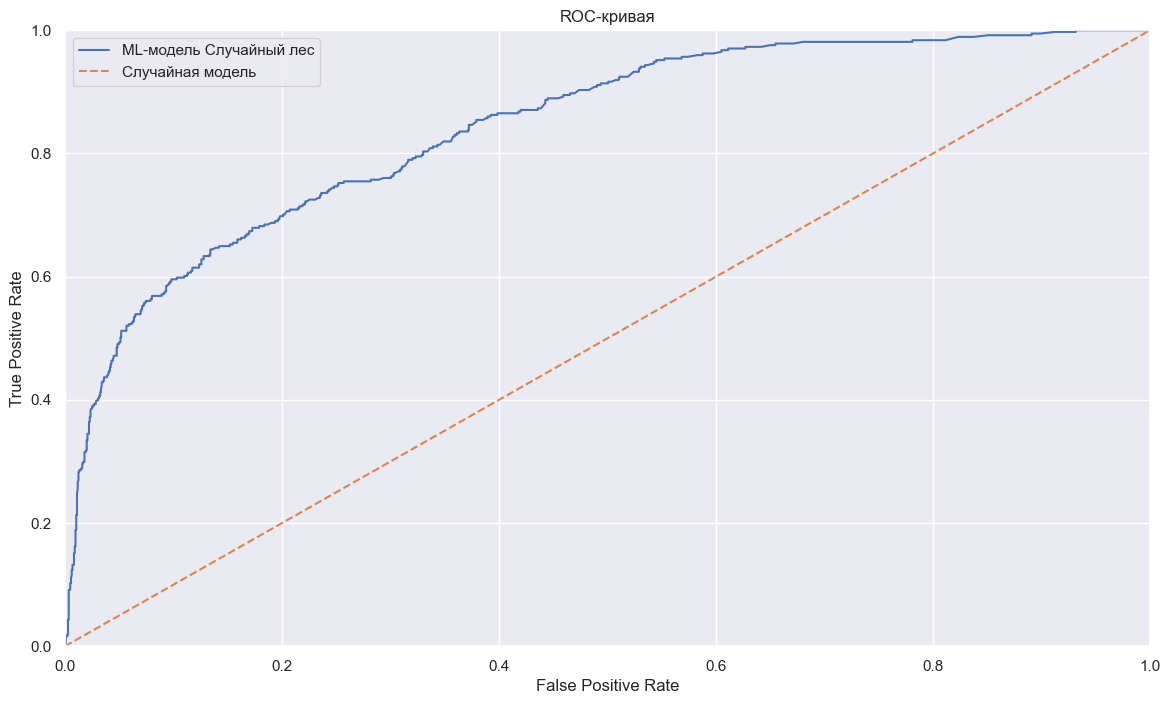

In [85]:
plt.figure(figsize=(14,8))

# Построим график с информацией о ROC-кривой
plt.plot(fpr_tree, tpr_tree)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# Применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Применяем функции plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Добавляем к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')
plt.legend(('ML-модель Случайный лес', 'Случайная модель'), loc= 'upper left') 
plt.show()

In [86]:
# Вычислим площадь под кривой рабочих характеристик (ROC AUC) по результатам прогнозирования.
# Для ML-модели RandomForestClassifier (Случайный лес)
auc_roc_tree = roc_auc_score(y_test, probabilities_one_valid_tree)
print(f'Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели RandomForestClassifier \
(Случайный лес) = {auc_roc_tree:.4f}')

Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели RandomForestClassifier (Случайный лес) = 0.8425


`ROC-кривая` показывает зависимость между долей верно классифицированных объектов положительного класса и долей ложноположительных объектов. Сама площадь под ROC-кривой является мерой качества классификатора: чем выше значение AUC (Area Under Curve), тем лучше качество классификации конкретной модели. Наш глаз и мозг устроены так, что мы очень хорошо видим геометрическую разницу (в данном случае площадей).

#### Рассчитаем и выведем на график показатели AUC-ROC, по всем использованным ML-моделям.

In [87]:
# Построим данные для ROC-кривой модели DecisionTreeClassifier (Дерево решений)
probabilities_forest = model_tree.predict_proba(X_test)
probabilities_one_valid_forest = probabilities_forest[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_test, probabilities_one_valid_forest)

In [88]:
# Построим данные для ROC-кривой модели LogisticRegression (Логистическая регрессия)
probabilities_log_reg = model_log_reg.predict_proba(X_test)
probabilities_one_valid_log_reg = probabilities_log_reg[:,1]
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(y_test, probabilities_one_valid_log_reg)

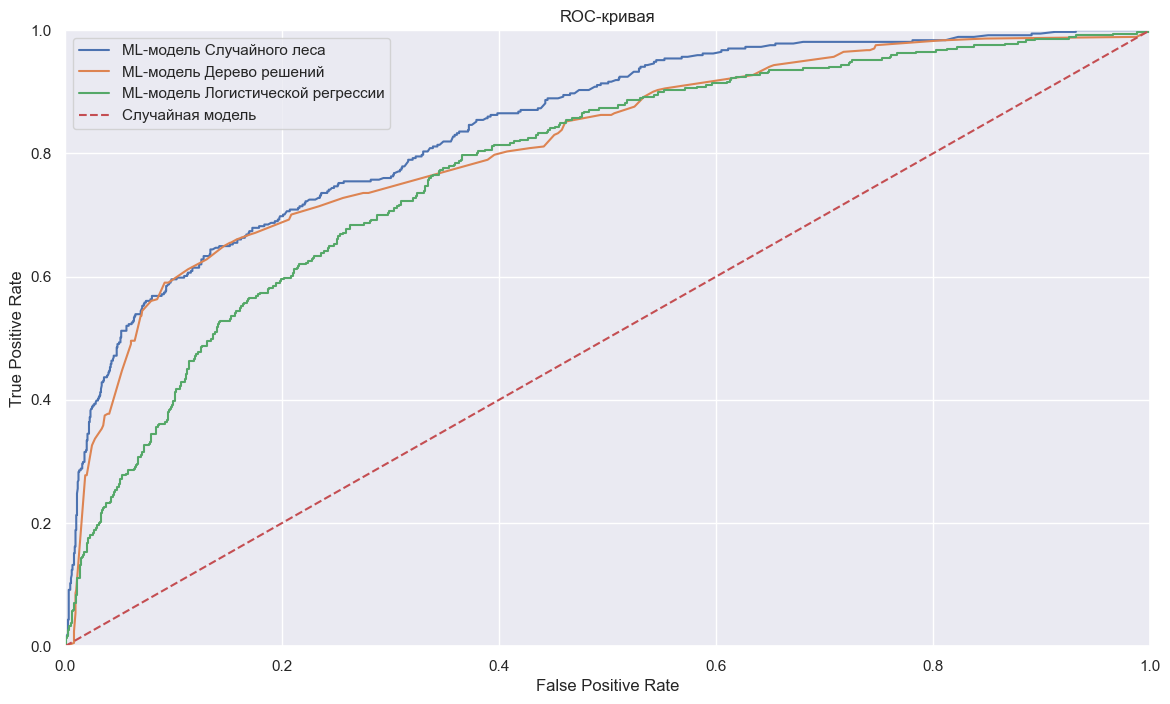

In [89]:
plt.figure(figsize=(14,8))

# Построим график с информацией о ROC-кривой
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_log_reg, tpr_log_reg)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# Применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Применяем функции plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Добавляем к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')
plt.legend(('ML-модель Случайного леса', 'ML-модель Дерево решений',  'ML-модель Логистической регрессии', 
            'Случайная модель'), loc= 'upper left') 
plt.show()

**Чтобы выявить, как сильно наша ML-модель Случайного леса отличается от случайной модели, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»).**

In [90]:
# Вычислим площадь под кривой рабочих характеристик (ROC AUC) по результатам прогнозирования.
# Для ML-модели DecisionTreeClassifier (Дерево решений)
auc_roc_forest = roc_auc_score(y_test, probabilities_one_valid_forest)
print(f'Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели DecisionTreeClassifier (Дерево решений) = {auc_roc_forest:.4f}')

Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели DecisionTreeClassifier (Дерево решений) = 0.8149


In [91]:
# Вычислим площадь под кривой рабочих характеристик (ROC AUC) по результатам прогнозирования.
# Для ML-модели LogisticRegression (Логистическая регрессия)
auc_roc_log_reg = roc_auc_score(y_test, probabilities_one_valid_log_reg)
print(f'Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели LogisticRegression \
(Логистическая регрессия)= {auc_roc_log_reg:.4f}')

Площадь под кривой рабочих характеристик (AUC-ROC) ML-модели LogisticRegression (Логистическая регрессия)= 0.7776


In [92]:
measure_auc_roc = {'Дерево решений': np.array([auc_roc_forest]), 'Случайный лес': np.array([auc_roc_tree]), 
     'Логистическая регрессия': np.array([auc_roc_log_reg])}
measure_auc_roc = pd.DataFrame(measure_auc_roc, index=['Значение AUC-ROC'])
measure_auc_roc

,Дерево решений,Случайный лес,Логистическая регрессия
Значение AUC-ROC,0.814864,0.842462,0.777565


**AUC-ROC это метрика качества, которая изменяется от 0 до 1. В результате нашего исследования площадь под кривой AUC-ROC ML-модели RandomForestClassifier (Случайный лес) ровна: 0,842462. Значение метрики AUC-ROC лучше чем у случайной модели. В общем случае чем ближе значение AUC-ROC к 1, тем точнее ML-модель предсказывает целевое значение.**

## Выводы

**В рамках первичного анализа данных, были проверены следующие параметры DataFrame:**
- Вывели и ознакомились с размерами таблицы. Таблица `содержит 10000 строк записей и 14 столбцов`.
- Вывели и ознакомились с названиями столбцов данных, а так же проверили коррекность их написания, что в рамках исследования позволит избежать ошибок при обращении к конкретным столбцам. `Названия столбцов корректны и не содержат ошибок в написании`.
- Вывели по 5 строк начала таблицы и конца таблицы, для визуальной оценки данных. На этом этапе мы определяем принадлежность данных к их типам, этот этап является обязательным так как, позволяет проверить корректность автоматическиго определения типа данных библиотекой Pandas.
- Выводим и анализируем типы данных автоматически распознанные библиотекой Pandas. На это этапе, мы сверяем автоматически сформированные типы данных библиотекой Pandas, с фактическими данными которые содержаться в DataFrame. В случае не корректного их определения, для корректности дальнейшего анализа, потребуется заменить тип данных. В результате проведённого анализа, сформирован вывод о `корректности автоматического определения типа данных`, типы данные осталяем без изменений.
- Проанализируем данные на наличие в них пустых значений. В случае наличия пропущенных/отсутсвующих данных необходимо провести работы направленные на восстановление данных, а в случае невозможности принять решение о необходимости их удаления из DataFrame. Этап позволяет исключить в дальнейшем исследовании искажение расчётов и итогового результата. По результатам проведённого исследования установлено в DataFrame имеет отсутсвующие значения, только в одном столбце `"Tenure"` (*сколько лет человек является клиентом банка*)
- Проведём исследование данных DataFrame на наличие полных дубликатов строк. На этом этапе проверки выяляются дублирующие строки, которые могут вносить искажения в результат проводимого исследования. В случае их обнаружения, необходимо в обязательном порядке очисть DataFrame от этих строк. В рамках проводимой работы, установлено в `DataFrame не содержит дубликатов данных`.
- **Содержание столбцов `RowNumber`, `CustomerId` и `Surname` содержат данные, которые не оказывают влияние на дальнейшее исследование. Принимается решение для удаления этих столбцов из DataFrame.**

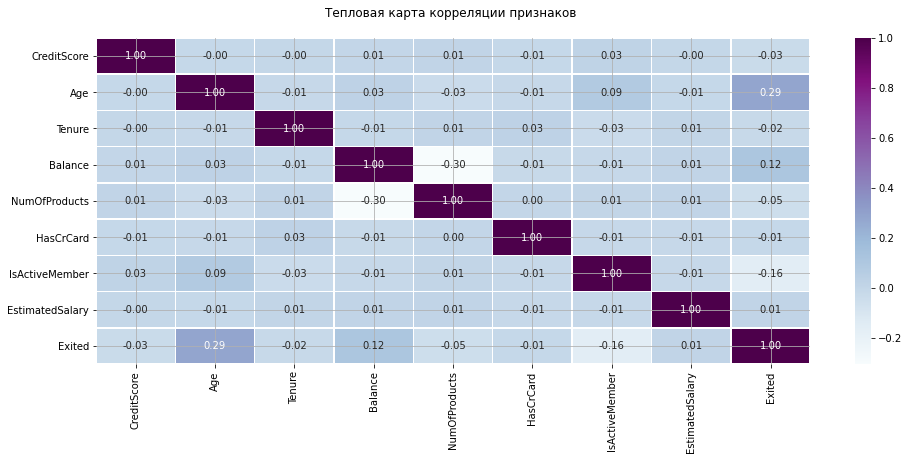

В результате построения тепловой карты корреляции, стоит отметить, что не смотря на отсутствие корреляции между признаками, имеется некоторая слабая зависимость между столбцами Exited и Age в размере 0.29. Т.к. размер этого значения менее 0.5 можно говорить что зависимость между данными отсутсвует.

**При исследовании данных проверены следующие гипотезы:**
- Замена отсутствующих значений средним значением или медианой. `Замена не целесообразна`, т.к. значение 5 столбца "Tenure" увеличивается в два раза, с 952 до 1836.
- Замена отсутствующих значений на основании данных столбца `Geography` (*страна проживания*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `Geography`.
- Замена отсутствующих значений на основании данных столбца `CreditScore` (*кредитный рейтинг*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `CreditScore`.
- Замена отсутствующих значений на основании данных столбца `Age` (*возраст*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `Age`.
- Замена отсутствующих значений на основании данных столбца `NumOfProducts` (*количество продуктов банка, используемых клиентом*). Замена не целесообразна, по причине отсутствия какой либо зависимости значений столбца `NumOfProducts`.

**Удалим отсутствующие значения в столбце `Tenure`.**


**Анализ наличия/отсутствия Дисбаланса в данных. Установлено `наличие Дисбаланса` в данных**
- Доля клиентов по которым зафиксирован уход в другой банк составляет **20.37% (2037 клиентов против 7963)**, что с точки зрения Баланса данных, является отклонением и `свидетельствует о наличии Дисбаланса в данных`.

**Применение методов устранения дисбаланса в данных**
- Исходные данные били разделены на 3 выборки `Обучающую (60%)`, `Валидационную (20%)` и `Тестовую (20%)`;
- При разделении данных на выборки, был использован параметр `"stratify"` обеспечивающий равномерное распределение целевых значений по новым выборкам 20,37% для Обучающей выборки, 20,40% для Валидационной выборки и 20,35% для Тестовой выборке;
- Произвели обогащение данных Обучающей выборки доведя значение равномерного распределения до показателя 1:1, т.е. увеличили количество строк содержащих целевое значение с 1222 до 4888;
- С учётом увеличения количества целевых данных, произвели перемешивание данных, чтобы исключить последоваительное их дублирование в тренировочной выборке;

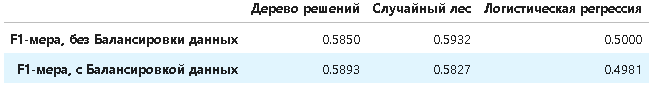

**Определяем наилучшую точность без балансировки и с балансировкой данных**
- Проведено исследование с построением и настройкой 3-х ML-моделей (DecisionTreeClassifier (Дерево решений), RandomForestClassifier (Случайный лес) и LogisticRegression (Логистическая регрессия)). 
- Для ML-моделей к исходным данным которых `не применялись` методы балансировки данных и равномерного распределения, произведено разделение исходных данных на `2 выборки в следующей пропорции 1:4`.
- Для ML-моделей к исходным данным которых `применялись` методы балансировки данных и равномерного распределения, произведено разделение исходных данных на `3 выборки (Обучающую, Валидационную и Тестовую) в пропорции 3:1:1`.
- Для ML-моделей подобраны гиперпараметры, которые обеспечивают лучшие итоговые результаты.

**Наилучший результат `0.5907` на тестовой выборке, показала ML-модель `RandomForestClassifier (Случайный лес)`, к данным которой применялись методы балансировки и равномерно распределения данных.**


**Справочно:** *Оценка F1 может быть интерпретирована как среднее гармоническое точности и отзыва, где оценка F1 достигает своего наилучшего значения при 1 и худшего значения при 0.*

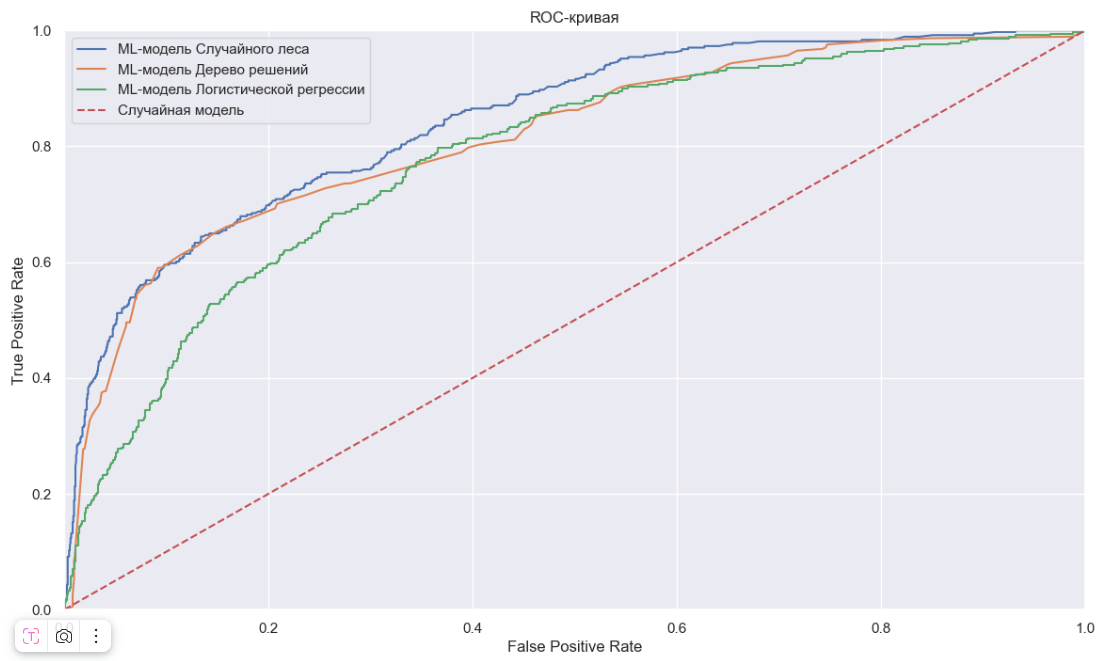

AUC-ROC это метрика качества, которая изменяется от 0 до 1. В общем случае чем ближе значение AUC-ROC  к 1, тем точнее ML-модель предсказывает целевое значение.

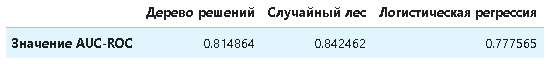

**В результате нашего исследования площадь под кривой AUC-ROC ML-модели RandomForestClassifier (Случайный лес) ровна: `0,842462`. `Значение метрики AUC-ROC лучше чем у случайной модели`.**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*